# 와인 데이터셋 (load_wine) - 군집화, 실루엣 분석

In [81]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [82]:
from sklearn.datasets import load_wine
wine = load_wine()
wineDF = pd.DataFrame(wine.data, columns=wine.feature_names)
wineDF['target'] = wine.target
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### 정규화 후 군집화

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

wine_std = StandardScaler().fit_transform(wine.data)
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)

In [84]:
wineDF['pca_x'] = wine_pca[:, 0]
wineDF['pca_y'] = wine_pca[:, 1]

In [85]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(wine_std)
wineDF['cluster'] = kmeans.labels_
clustering_result = wineDF.groupby(['target','cluster'])['alcohol', 'malic_acid'].count()
clustering_result

alcohol  malic_acid
target cluster                     
0      1             59          59
1      0              3           3
       1              3           3
       2             65          65
2      0             48          48

In [86]:
markers=['^', 'o', 's']

In [87]:
# visualization 모듈화
def visualization_with_normalize(df, column, markers):
    for i, marker in enumerate(markers):
        x_axis_data = df[df[column] == i]['pca_x']
        y_axis_data = df[df[column] == i]['pca_y']
        plt.scatter(x_axis_data, y_axis_data, marker=marker)

    plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
    plt.title('3 Clusters Visualization with Normalization')
    plt.show()

- Clustered Data

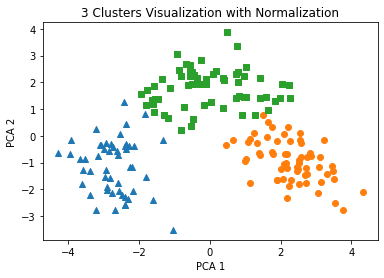

In [88]:
visualization_with_normalize(wineDF, 'cluster', markers)

- Original Data

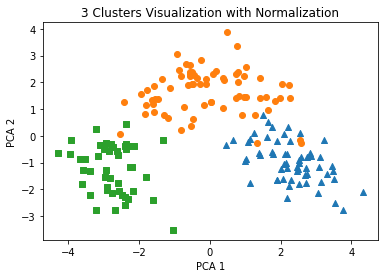

In [89]:
visualization_with_normalize(wineDF, 'target', markers)

- Original 데이터, Clustered 데이터 비교

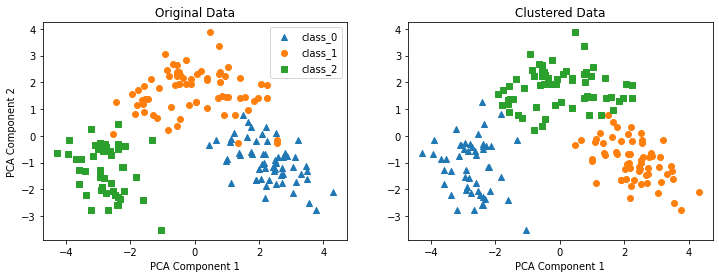

In [90]:
fig, axs = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
columns = ['target', 'cluster']

for k, column in enumerate(columns):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = wineDF[wineDF[column] == i]['pca_x']
        y_axis_data = wineDF[wineDF[column] == i]['pca_y']
        ax.scatter(x_axis_data, y_axis_data, marker=marker,
                    label=wine.target_names[i])

    if k == 0:
        ax.set_title('Original Data')
        ax.set_ylabel('PCA Component 2')
        ax.legend()
    else:
        ax.set_title('Clustered Data')
    ax.set_xlabel('PCA Component 1')

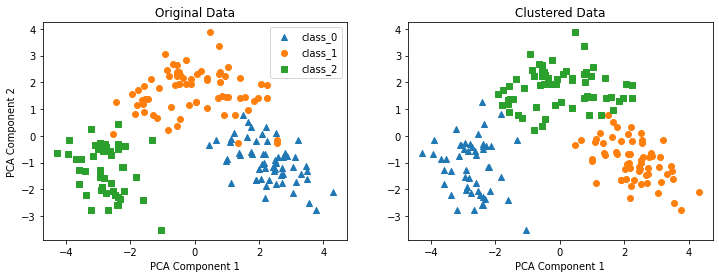

In [91]:
fig, axs = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
columns = ['target', 'cluster']

for k, column in enumerate(columns):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = wineDF[wineDF[column] == i]['pca_x']
        y_axis_data = wineDF[wineDF[column] == i]['pca_y']
        ax.scatter(x_axis_data, y_axis_data, marker=marker,
                    label=wine.target_names[i])

    if k == 0:
        ax.set_title('Original Data')
        ax.set_ylabel('PCA Component 2')
        ax.legend()
    else:
        ax.set_title('Clustered Data')
    ax.set_xlabel('PCA Component 1')

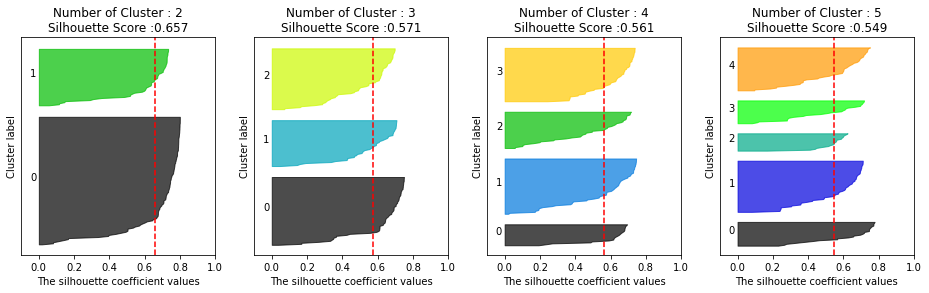

In [92]:
from visualize import visualize_silhouette

visualize_silhouette([2, 3, 4, 5], wine.data)

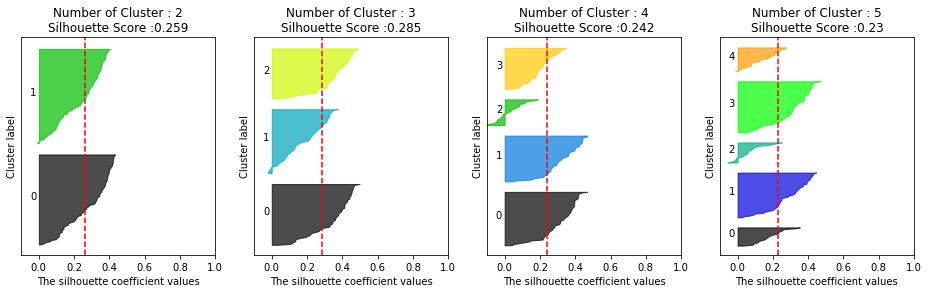

In [93]:
visualize_silhouette([2, 3, 4, 5], wine_std)